In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from matplotlib.patches import Circle




In [15]:
data = np.loadtxt('data/heatmap.txt')
data = data / data.max()

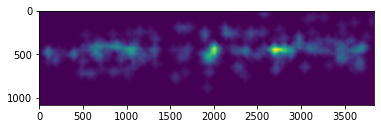

In [16]:
plt.imshow(data);

In [26]:
data.shape

(1080, 3840)

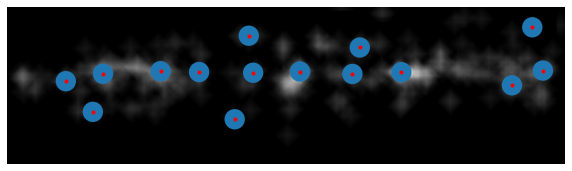

In [46]:
image_max = ndi.maximum_filter(data, size=20, mode='constant')

coordinates = peak_local_max(data, min_distance=140)

fix, ax = plt.subplots(figsize=(10, 9))

ax.imshow(data, cmap=plt.cm.gray)
ax.autoscale(False)
ax.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax.axis('off')

for y, x in coordinates:
    circ = Circle((x, y), 70)
    ax.add_patch(circ)

fig.tight_layout()

plt.show()

In [43]:
np.c_[coordinates, 70 * np.ones(coordinates.shape[0])]

array([[ 449., 2712.,   70.],
       [ 445., 2015.,   70.],
       [ 444., 1055.,   70.],
       [ 440., 3689.,   70.],
       [ 460.,  659.,   70.],
       [ 461., 2375.,   70.],
       [ 511.,  403.,   70.],
       [ 449., 1321.,   70.],
       [ 198., 1662.,   70.],
       [ 453., 1692.,   70.],
       [ 722.,  589.,   70.],
       [ 773., 1562.,   70.]])

In [39]:
coordinates.shape

(12, 2)

In [42]:
x

array([70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.])